In [47]:
import pandas as pd
import numpy as np 
import matplotlib as pl
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')


# explore data

In [48]:
df=pd.read_csv("egypt_real_estate_listings.csv")
df.head()

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"


In [49]:
df.isnull().sum()


url                   0
price               539
description          78
location             91
type                 77
size                 77
bedrooms            144
bathrooms           140
available_from      663
payment_method      541
down_payment      14479
dtype: int64

In [50]:
null_price_rows = df[df['payment_method'].isnull()]
null_price_rows.head(10)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
7945,https://www.propertyfinder.eg/en/plp/buy/chale...,NaN,"Silver Sands in Sidi Heneish, North Coast is a...","Silver Sands, Qesm Marsa Matrouh, North Coast",Chalet,"3,025 sqft / 281 sqm",4+ Maid,3,7 Aug 2025,NaN,NaN
7948,https://www.propertyfinder.eg/en/plp/buy/penth...,NaN,A Penthouse with a Panoramic View in The Fifth...,"Moon Residences, Fifth Square, The 5th Settlem...",Penthouse,"2,034 sqft / 189 sqm",3,4,31 Aug 2025,NaN,NaN
7954,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,Resale Standalone in allegria with largest are...,"Allegria, Sheikh Zayed Compounds, Sheikh Zayed...",Villa,"7,858 sqft / 730 sqm",6+ Maid,7+,28 Aug 2025,NaN,NaN
7975,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,Villa for Sale in Marsa Baghush\n• Built-up ar...,"Marsa Baghush, Qesm Marsa Matrouh, North Coast",Villa,"3,337 sqft / 310 sqm",4+ Maid,5,31 Aug 2025,NaN,NaN
7996,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,- فيلا للبيع 350م توين هاوس قرية لازوردي الكيل...,"Lazorde Bay, Sidi Abdel Rahman, North Coast",Villa,"3,767 sqft / 350 sqm",5,4,8 May 2025,NaN,NaN
8011,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,Villa for sale\nSheikh Zayed Etapa Compound\n-...,"Etapa, Sheikh Zayed Compounds, Sheikh Zayed Ci...",Villa,"2,680 sqft / 249 sqm",4+ Maid,4,13 Jul 2025,NaN,NaN
8029,https://www.propertyfinder.eg/en/plp/buy/villa...,NaN,A rare opportunity to own a luxurious standalo...,"Hacienda Bay, Sidi Abdel Rahman, North Coast",Villa,"4,951 sqft / 460 sqm",5+ Maid,7,4 Aug 2025,NaN,NaN
8043,https://www.propertyfinder.eg/en/plp/buy/townh...,NaN,تاون هاوس الترا لوكس كمبوند بالم باركس بالم هي...,"Palm Parks Palm Hills, South Dahshur Link, 6...",Townhouse,"2,799 sqft / 260 sqm",4+ Maid,5,22 Aug 2025,NaN,NaN
8141,https://www.propertyfinder.eg/en/plp/buy/apart...,NaN,Apartment with garden for sale\nDistrict 5 - F...,"District 5, 5th Settlement Compounds, The 5th ...",Apartment,"1,604 sqft / 149 sqm",2+ Maid,3,19 Aug 2025,NaN,NaN
8175,https://www.propertyfinder.eg/en/plp/buy/chale...,NaN,Chalet for Sale – Fully Finished with Kitchen ...,"Seazen, Qesm Ad Dabaah, North Coast",Chalet,"1,507 sqft / 140 sqm",3,3,31 Aug 2025,NaN,NaN


In [51]:
filtered_rows = df[df['payment_method'].isnull() & df['price'].notnull()]
filtered_rows.head(10)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
14097,https://www.propertyfinder.eg/en/plp/buy/chale...,"16,495,000",Azha north coast\nSenior upper chalet\nPhase v...,"Azha North, Ras Al Hekma, North Coast",Chalet,"1,938 sqft / 180 sqm",4+ Maid,6,13 Mar 2025,NaN,NaN
15659,https://www.propertyfinder.eg/en/plp/buy/villa...,"155,000,000",Sodic Ogami – One-Story Villa\nLand: 748 sqm\n...,"Ogami, Ras Al Hekma, North Coast",Villa,"3,821 sqft / 355 sqm",4+ Maid,4,10 Nov 2024,NaN,NaN


In [52]:
df["type"].value_counts()

type
Apartment          8355
Chalet             4038
Villa              3570
Townhouse          1335
Twin House          834
Duplex              622
Penthouse           569
iVilla              268
Hotel Apartment     104
Land                 63
Cabin                38
Palace               23
Whole Building       14
Roof                  6
Full Floor            4
Bulk Sale Unit        3
Bungalow              1
Name: count, dtype: int64

In [53]:
df["payment_method"].value_counts()

payment_method
Cash            15521
Installments     3862
Name: count, dtype: int64

In [54]:
df.drop("url",axis=1)

,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment
0,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP"
1,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP"
2,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP"
3,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP"
4,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP"
...,...,...,...,...,...,...,...,...,...,...
19919,"10,500,000",Code: 2404\nChalet for sale in North Edge Towe...,"North Edge Towers, New Alamein City, Al Alamei...",Chalet,"1,259 sqft / 117 sqm",2,2,21 Aug 2025,Cash,NaN
19920,"24,000,000",Duplex for sale in Eastown -Sodic\n5th settlem...,"Eastown, 5th Settlement Compounds, The 5th Set...",Duplex,"2,756 sqft / 256 sqm",3+ Maid,4,1 Sep 2025,Cash,NaN
19921,"3,000,000",Chalet for Sale in One of the Prime Projects o...,"White Sand, Markaz Al Hamam, North Coast",Chalet,"1,195 sqft / 111 sqm",2,2,30 Jul 2025,Cash,NaN
19922,"9,500,000",Villa for sale in installments in Sarai Compou...,"Sarai, Mostakbal City Compounds, Mostakbal Cit...",Villa,"2,573 sqft / 239 sqm",5,4,23 Aug 2025,Cash,NaN


# preprocessing

In [55]:
# seprate messurment unite from numbers on size columns

def extract_size(val):
    if pd.isnull(val):
        return pd.Series([None, None, None, None])
    try:
        parts = val.split('/')  # split by '/'
        sqft_part = parts[0].strip()  # e.g., '3,025 sqft'
        sqm_part = parts[1].strip()   # e.g., '281 sqm'
        
        sqft_num = float(sqft_part.replace('sqft','').replace(',','').strip())
        sqm_num = float(sqm_part.replace('sqm','').replace(',','').strip())
        
        return pd.Series([sqft_num, 'sqft', sqm_num, 'sqm'])
    except:
        return pd.Series([None, None, None, None])

# Apply function
df[['size_sqft', 'unit_sqft', 'size_sqm', 'unit_sqm']] = df['size'].apply(extract_size)

df

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1+ Maid,1,31 Aug 2025,Cash,"1,200,000 EGP",732.0,sqft,68.0,sqm
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4,2 Sep 2025,Cash,"2,100,000 EGP",2368.0,sqft,220.0,sqm
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2,19 Aug 2025,Cash,"1,513,000 EGP",1270.0,sqft,118.0,sqm
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2,26 Aug 2025,Installments,"1,260,000 EGP",1787.0,sqft,166.0,sqm
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7,2 Sep 2025,Cash,"2,262,500 EGP",4306.0,sqft,400.0,sqm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,https://www.propertyfinder.eg/en/plp/buy/chale...,"10,500,000",Code: 2404\nChalet for sale in North Edge Towe...,"North Edge Towers, New Alamein City, Al Alamei...",Chalet,"1,259 sqft / 117 sqm",2,2,21 Aug 2025,Cash,NaN,1259.0,sqft,117.0,sqm
19920,https://www.propertyfinder.eg/en/plp/buy/duple...,"24,000,000",Duplex for sale in Eastown -Sodic\n5th settlem...,"Eastown, 5th Settlement Compounds, The 5th Set...",Duplex,"2,756 sqft / 256 sqm",3+ Maid,4,1 Sep 2025,Cash,NaN,2756.0,sqft,256.0,sqm
19921,https://www.propertyfinder.eg/en/plp/buy/chale...,"3,000,000",Chalet for Sale in One of the Prime Projects o...,"White Sand, Markaz Al Hamam, North Coast",Chalet,"1,195 sqft / 111 sqm",2,2,30 Jul 2025,Cash,NaN,1195.0,sqft,111.0,sqm
19922,https://www.propertyfinder.eg/en/plp/buy/villa...,"9,500,000",Villa for sale in installments in Sarai Compou...,"Sarai, Mostakbal City Compounds, Mostakbal Cit...",Villa,"2,573 sqft / 239 sqm",5,4,23 Aug 2025,Cash,NaN,2573.0,sqft,239.0,sqm


In [56]:
df['bathrooms'] = df['bathrooms'].str.replace('+','', regex=False)
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')  # converts invalid to NaN


In [57]:
df["bedrooms"].value_counts()


bedrooms
3               4959
3+ Maid         3737
2               2849
4+ Maid         2126
2+ Maid         1748
4               1126
5+ Maid          786
1                751
1+ Maid          447
5                325
studio           280
6+ Maid          254
7+ Maid          128
6                 93
7++ Maid          67
studio+ Maid      48
7                 33
7+                23
Name: count, dtype: int64

In [58]:
"""
i convert studio to 0 and seprate mid and mapping it 0 if bedrooms don't have mid 1 if it have
"""
def clean_bedrooms(val):
    if pd.isnull(val):
        return pd.Series([0, 0])   # bedrooms, mid_room
    
    val = str(val).lower().strip()

    # Check for 'mid' or 'maid'
    mid_room = 1 if 'mid' in val or 'maid' in val else 0

    # Replace 'studio' with 0
    if 'studio' in val:
        bedrooms = 0
    else:
        # Keep only digits
        cleaned = ''.join(ch for ch in val if ch.isdigit())
        bedrooms = int(cleaned) if cleaned else 0

    return pd.Series([bedrooms, mid_room])

# Apply the function
df[['bedrooms', 'mid_room']] = df['bedrooms'].apply(clean_bedrooms)

df.head()


,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm,mid_room
0,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,000,000",OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1,1.0,31 Aug 2025,Cash,"1,200,000 EGP",732.0,sqft,68.0,sqm,1
1,https://www.propertyfinder.eg/en/plp/buy/villa...,"25,000,000","For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4.0,2 Sep 2025,Cash,"2,100,000 EGP",2368.0,sqft,220.0,sqm,0
2,https://www.propertyfinder.eg/en/plp/buy/chale...,"15,135,000","With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2.0,19 Aug 2025,Cash,"1,513,000 EGP",1270.0,sqft,118.0,sqm,0
3,https://www.propertyfinder.eg/en/plp/buy/apart...,"12,652,000",Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2.0,26 Aug 2025,Installments,"1,260,000 EGP",1787.0,sqft,166.0,sqm,0
4,https://www.propertyfinder.eg/en/plp/buy/villa...,"45,250,000",Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7.0,2 Sep 2025,Cash,"2,262,500 EGP",4306.0,sqft,400.0,sqm,0


In [59]:
## Filter only studio rows
studio_mid = df[(df['bedrooms'] == 0) & (df['mid_room'] == 1)]

studio_mid.head(10)

,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm,mid_room
351,https://www.propertyfinder.eg/en/plp/buy/apart...,"6,236,505",Unit Type: Studio\n1 Bedroom\nBuilt Up Area: 4...,"Mangroovy Residence, Al Gouna, Hurghada, Red Sea",Apartment,495 sqft / 46 sqm,0,1.0,31 Aug 2025,Cash,"3,000,000 EGP",495.0,sqft,46.0,sqm,1
974,https://www.propertyfinder.eg/en/plp/buy/chale...,"10,185,000",_ PROJECT NAME :GOUNA\n_ DEVELOPER NAME : ORAS...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,743 sqft / 69 sqm,0,1.0,1 Sep 2025,Cash,"4,734,000 EGP",743.0,sqft,69.0,sqm,1
1063,https://www.propertyfinder.eg/en/plp/buy/apart...,"9,100,000",finished studio for sale in zayed city by Ora ...,"Village Views, Zed Towers, Sheikh Zayed Compou...",Apartment,775 sqft / 72 sqm,0,1.0,2 Sep 2025,Installments,NaN,775.0,sqft,72.0,sqm,1
1367,https://www.propertyfinder.eg/en/plp/buy/chale...,"2,450,000",شاليه فندقي 30م مفروش بالكامل بإطلالة بحر\nامت...,"Glee, Qesm Borg El Arab, North Coast",Chalet,323 sqft / 30 sqm,0,1.0,31 Aug 2025,Cash,"122,500 EGP",323.0,sqft,30.0,sqm,1
1378,https://www.propertyfinder.eg/en/plp/buy/apart...,"2,000,000","In Cavalli Residence Compound, Fifth Settlemen...","Jadie Residence, The 3rd Settlement, New Cairo...",Apartment,592 sqft / 55 sqm,0,1.0,30 Aug 2025,Cash,"200,000 EGP",592.0,sqft,55.0,sqm,1
1987,https://www.propertyfinder.eg/en/plp/buy/apart...,"5,711,505",Studio In Maraya\nBUA: 46\n1 Bedroom\n1Bathroo...,"Bali, Al Gouna, Hurghada, Red Sea",Apartment,495 sqft / 46 sqm,0,1.0,1 Sep 2025,Cash,"2,000,000 EGP",495.0,sqft,46.0,sqm,1
2121,https://www.propertyfinder.eg/en/plp/buy/apart...,"420,000",مشروع قطاميه جيت\n- اللوكيشن علي دائري المعاد...,"Katameya Gate, El Katameya Compounds, El Katam...",Apartment,452 sqft / 42 sqm,0,1.0,13 Aug 2025,Cash,NaN,452.0,sqft,42.0,sqm,1
2641,https://www.propertyfinder.eg/en/plp/buy/hotel...,"13,294,000",for sale hotel apartment panorama Nile view\nb...,"Reve Du Nil, Athar El Nabi, Hay Masr El Kadima...",Hotel Apartment,495 sqft / 46 sqm,0,1.0,31 Aug 2025,Installments,"3,323,500 EGP",495.0,sqft,46.0,sqm,1
3105,https://www.propertyfinder.eg/en/plp/buy/chale...,"8,134,430",Apartment for Sale in Installments at South Me...,"South Med, Qesm Ad Dabaah, North Coast",Chalet,678 sqft / 63 sqm,0,1.0,30 Aug 2025,Installments,"642,235 EGP",678.0,sqft,63.0,sqm,1
3707,https://www.propertyfinder.eg/en/plp/buy/apart...,"6,900,000",ready to move studio at badya semi finished\n9...,"Badya Palm Hills, 6 October Compounds, 6 Octob...",Apartment,"1,012 sqft / 94 sqm",0,1.0,31 Aug 2025,Cash,"104,000 EGP",1012.0,sqft,94.0,sqm,1


In [60]:
# Remove commas and convert to float
df['price'] = (
    df['price']
    .astype(str)         # ensure all are strings
    .str.replace(',', '', regex=False)  # remove commas
    .str.strip()         # remove spaces
    .replace('', None)   # replace empty strings with None
    .astype(float)       # convert to float
)


In [61]:
df.isnull().sum()

url                   0
price               539
description          78
location             91
type                 77
size                 77
bedrooms              0
bathrooms           145
available_from      663
payment_method      541
down_payment      14479
size_sqft            77
unit_sqft            77
size_sqm             77
unit_sqm             77
mid_room              0
dtype: int64

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'size_sqft'}>],
       [<Axes: title={'center': 'size_sqm'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>, <Axes: >]], dtype=object)

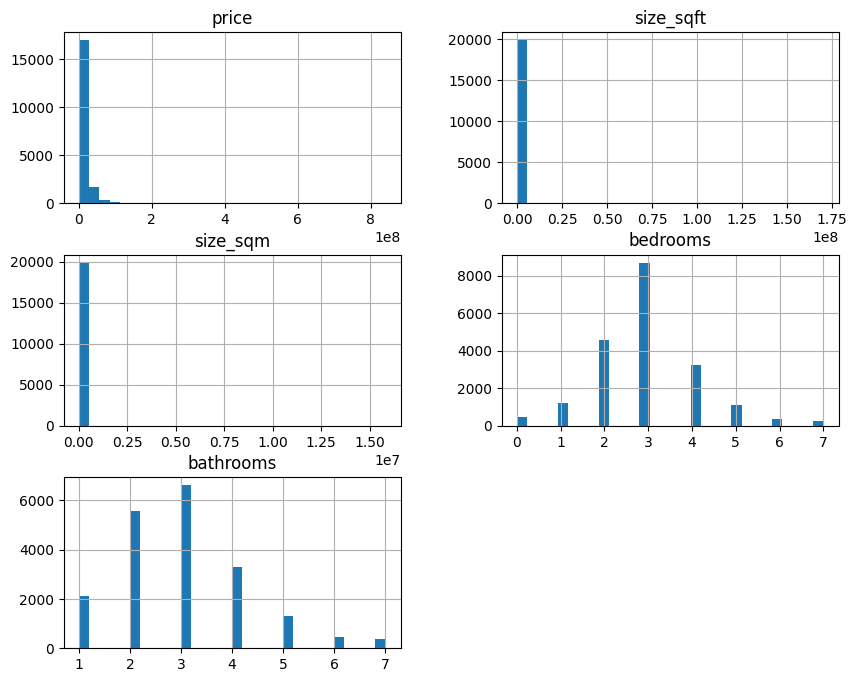

In [62]:
df[['price', 'size_sqft', 'size_sqm', 'down_payment', 'bedrooms', 'bathrooms']].hist(figsize=(10, 8), bins=30)


In [63]:
# Separate numeric and object columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with median
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# Fill object columns with mode (most frequent)
for col in obj_cols:
    mode_val = df[col].mode()[0] if not df[col].mode().empty else None
    df[col].fillna(mode_val, inplace=True)


/tmp/ipykernel_9581/2781005862.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_9581/2781005862.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [64]:
def check_outliers(df):
    for col in df.columns:
        if df[col].dtype != 'object':
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"Column: {col}")
            print(f"Outliers: {len(outliers)}")
    return df
check_outliers(df)        

Column: price
Outliers: 1564
Column: bedrooms
Outliers: 2181
Column: bathrooms
Outliers: 0
Column: size_sqft
Outliers: 1442
Column: size_sqm
Outliers: 1442
Column: mid_room
Outliers: 0


,url,price,description,location,type,size,bedrooms,bathrooms,available_from,payment_method,down_payment,size_sqft,unit_sqft,size_sqm,unit_sqm,mid_room
0,https://www.propertyfinder.eg/en/plp/buy/chale...,8000000.0,OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...,"Swan Lake Gouna, Al Gouna, Hurghada, Red Sea",Chalet,732 sqft / 68 sqm,1,1.0,31 Aug 2025,Cash,"1,200,000 EGP",732.0,sqft,68.0,sqm,1
1,https://www.propertyfinder.eg/en/plp/buy/villa...,25000000.0,"For sale, a villa with immediate delivery in C...","Karmell, New Zayed City, Sheikh Zayed City, Giza",Villa,"2,368 sqft / 220 sqm",4,4.0,2 Sep 2025,Cash,"2,100,000 EGP",2368.0,sqft,220.0,sqm,0
2,https://www.propertyfinder.eg/en/plp/buy/chale...,15135000.0,"With a down payment of EGP 1,513,000, a fully ...","Azha North, Ras Al Hekma, North Coast",Chalet,"1,270 sqft / 118 sqm",2,2.0,19 Aug 2025,Cash,"1,513,000 EGP",1270.0,sqft,118.0,sqm,0
3,https://www.propertyfinder.eg/en/plp/buy/apart...,12652000.0,Own an apartment in New Cairo with a minimal d...,"Taj City, 5th Settlement Compounds, The 5th Se...",Apartment,"1,787 sqft / 166 sqm",3,2.0,26 Aug 2025,Installments,"1,260,000 EGP",1787.0,sqft,166.0,sqm,0
4,https://www.propertyfinder.eg/en/plp/buy/villa...,45250000.0,Project: Granville\nLocation: Fifth Settlement...,"Granville, New Capital City, Cairo",Villa,"4,306 sqft / 400 sqm",7,7.0,2 Sep 2025,Cash,"2,262,500 EGP",4306.0,sqft,400.0,sqm,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19919,https://www.propertyfinder.eg/en/plp/buy/chale...,10500000.0,Code: 2404\nChalet for sale in North Edge Towe...,"North Edge Towers, New Alamein City, Al Alamei...",Chalet,"1,259 sqft / 117 sqm",2,2.0,21 Aug 2025,Cash,"100,000 EGP",1259.0,sqft,117.0,sqm,0
19920,https://www.propertyfinder.eg/en/plp/buy/duple...,24000000.0,Duplex for sale in Eastown -Sodic\n5th settlem...,"Eastown, 5th Settlement Compounds, The 5th Set...",Duplex,"2,756 sqft / 256 sqm",3,4.0,1 Sep 2025,Cash,"100,000 EGP",2756.0,sqft,256.0,sqm,1
19921,https://www.propertyfinder.eg/en/plp/buy/chale...,3000000.0,Chalet for Sale in One of the Prime Projects o...,"White Sand, Markaz Al Hamam, North Coast",Chalet,"1,195 sqft / 111 sqm",2,2.0,30 Jul 2025,Cash,"100,000 EGP",1195.0,sqft,111.0,sqm,0
19922,https://www.propertyfinder.eg/en/plp/buy/villa...,9500000.0,Villa for sale in installments in Sarai Compou...,"Sarai, Mostakbal City Compounds, Mostakbal Cit...",Villa,"2,573 sqft / 239 sqm",5,4.0,23 Aug 2025,Cash,"100,000 EGP",2573.0,sqft,239.0,sqm,0


🧾 Outlier Investigation Report
1. Price

During the exploration, a wide range of property prices was observed — from very low to extremely high values.

These variations reflect the real nature of the Egyptian real estate market, where properties in different cities and neighborhoods vary drastically in price.

Therefore, removing outliers could lead to loss of important market diversity.

Decision: Keep all price values, as they represent true market differences, not data errors.

2. Bedrooms

Outliers appeared for bedroom counts such as 0, 5, 6, and 7.

However, these are still valid property configurations (e.g., studios with 0 bedrooms, villas with 6–7 bedrooms).

Dropping them would remove meaningful property categories from the dataset.

Decision: Retain all bedroom values since they are realistic variations.

3. Down Payment

Similar to prices, down_payment values show a wide spread due to different property types and payment plans.

These differences are expected — not anomalies — as some properties require full payment while others have flexible installments.

Decision: Keep all values, as high variation is naturally part of real estate financing.

4. Size (sqm and sqft)

size_sqft and size_sqm values vary widely.

This is logical because the dataset includes apartments, duplexes, and villas of different scales.

Outliers here represent different property types rather than errors.

Decision: Keep all size values, but consider standardizing or transforming them (e.g., log scale) for modeling.

✅ Final Decision

Outliers were investigated but not removed, as they mostly represent natural variability in property features and pricing rather than data entry errors. Keeping them preserves the dataset’s diversity and representativeness of the Egyptian real estate market.

In [65]:
df[['compound', 'district', 'city', 'governorate']] = df['location'].str.split(',', expand=True, n=3)
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


# feature engineering

In [66]:
df["price_per_sqm"] = df["price"] / df["size_sqm"]
df["price_per_sqft"] = df["price"] / df["size_sqft"]


In [67]:
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment',
       'size_sqft', 'unit_sqft', 'size_sqm', 'unit_sqm', 'mid_room',
       'compound', 'district', 'city', 'governorate', 'price_per_sqm',
       'price_per_sqft'],
      dtype='object')

In [68]:
df["description"]

0        OWN A CHALET IN EL GOUNA WITH A PRIME LOCATION...
1        For sale, a villa with immediate delivery in C...
2        With a down payment of EGP 1,513,000, a fully ...
3        Own an apartment in New Cairo with a minimal d...
4        Project: Granville\nLocation: Fifth Settlement...
                               ...                        
19919    Code: 2404\nChalet for sale in North Edge Towe...
19920    Duplex for sale in Eastown -Sodic\n5th settlem...
19921    Chalet for Sale in One of the Prime Projects o...
19922    Villa for sale in installments in Sarai Compou...
19923    Ground Chalet with Garden in Mountain View Nor...
Name: description, Length: 19924, dtype: object

# EDA 

In [69]:
# Average price per city


price_by_city = df.groupby('city')['price'].mean().sort_values(ascending=False)
print(price_by_city)

# Average price per district
price_by_district = df.groupby('district')['price'].mean().sort_values(ascending=False)
print(price_by_district)

price_per_compound=df.groupby('compound')['price'].mean().sort_values(ascending=False)
print(price_per_compound)

price_per_government=df.groupby('governorate')['price'].mean().sort_values(ascending=False)
print(price_per_government)


city
El Katameya             7.875048e+07
Mokattam                4.279254e+07
Borg El Arab City       2.400000e+07
Qesm Ad Dabaah          2.245447e+07
North Coast             2.244329e+07
                            ...     
Aswan                   2.535000e+06
Sharqia                 2.455000e+06
Imbaba                  2.442500e+06
Hay El Haram            2.431250e+06
10th of Ramadan City    1.450000e+06
Name: price, Length: 80, dtype: float64
district
El Katameya Compounds    7.875048e+07
Monshaat Al Bakari       5.000000e+07
Uptown Cairo             4.417356e+07
Golf City                4.200000e+07
El Banafseg 8            4.000000e+07
                             ...     
New Obour City           1.635833e+06
El Mariouteya            1.634762e+06
Badr City                1.504297e+06
Sharqia                  1.500000e+06
Neighborhood 26          1.450000e+06
Name: price, Length: 295, dtype: float64
compound
Concord Plaza       3.000000e+08
Katameya Heights    2.050339e+08
Katam

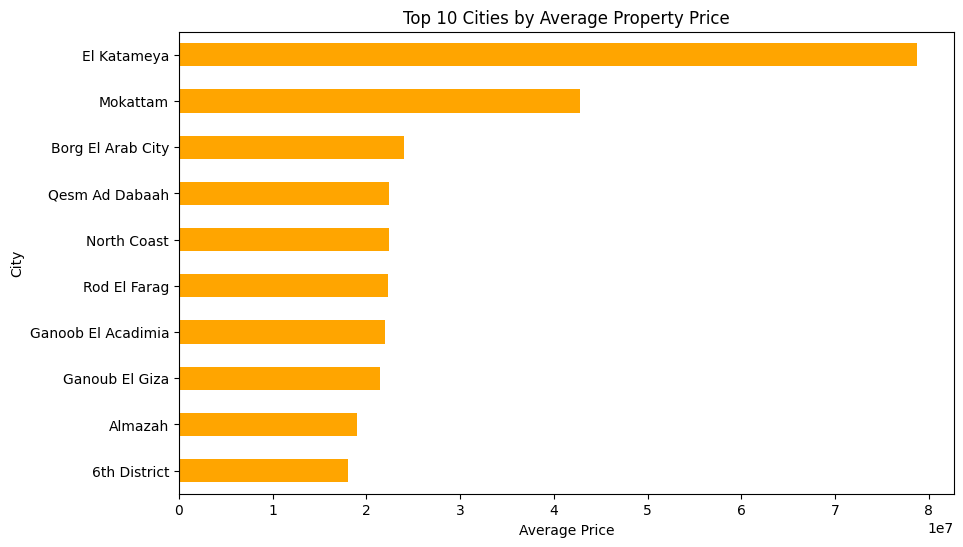

In [70]:
import matplotlib.pyplot as plt

# Top 10 most expensive cities
price_by_city.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('City')
plt.title('Top 10 Cities by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


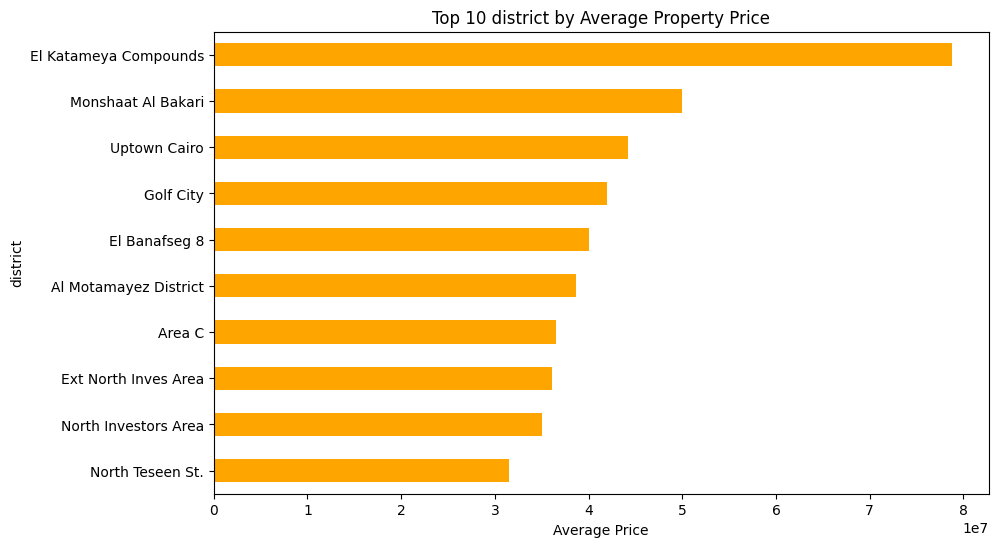

In [71]:
price_by_district.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('district')
plt.title('Top 10 district by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


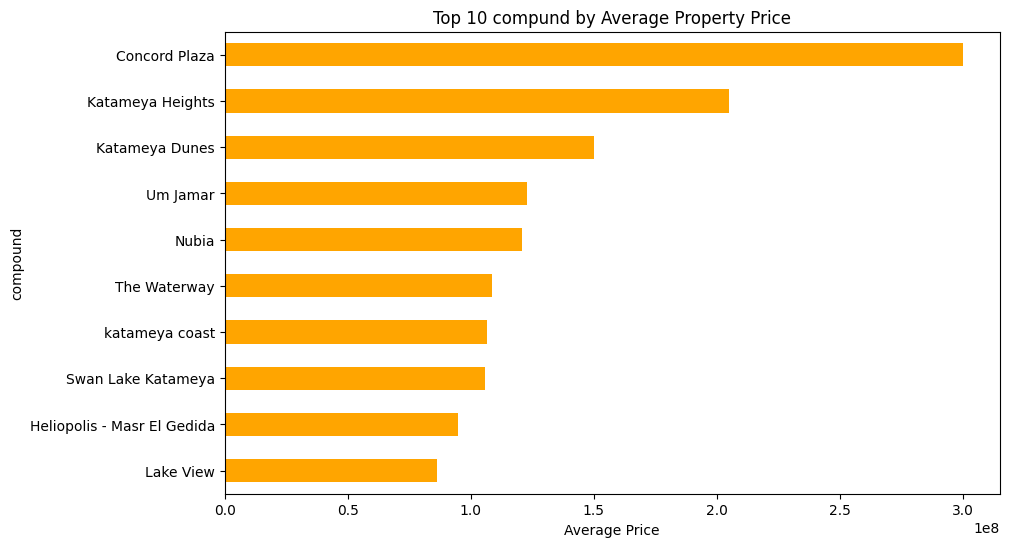

In [72]:
price_per_compound.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('compound')
plt.title('Top 10 compund by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


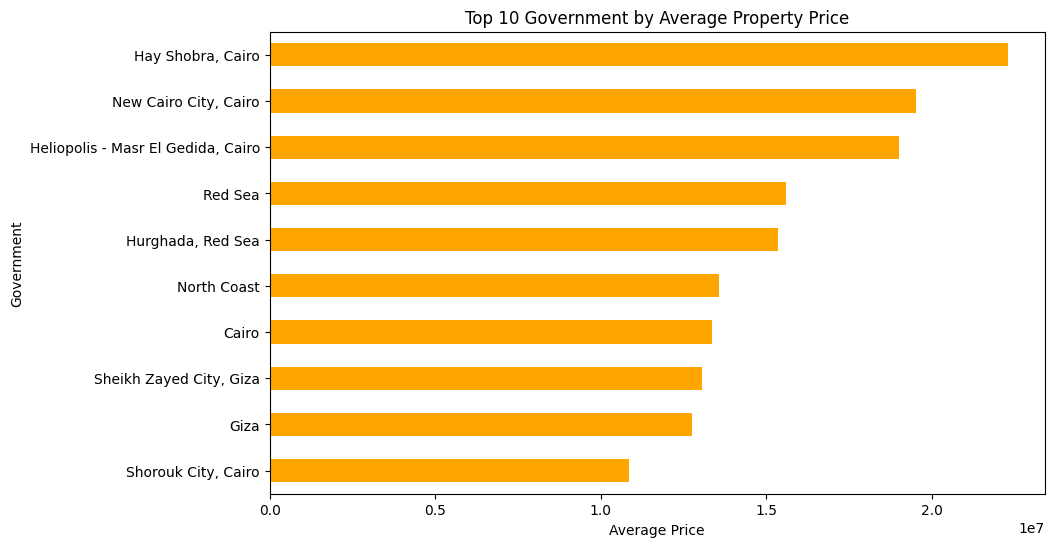

In [73]:
# Top 10 most expensive cities
price_per_government.head(10).plot(kind='barh', figsize=(10,6), color='orange')
plt.xlabel('Average Price')
plt.ylabel('Government')
plt.title('Top 10 Government by Average Property Price')
plt.gca().invert_yaxis()  # highest on top
plt.show()


In [94]:
df.columns

Index(['url', 'price', 'description', 'location', 'type', 'size', 'bedrooms',
       'bathrooms', 'available_from', 'payment_method', 'down_payment',
       'size_sqft', 'unit_sqft', 'size_sqm', 'unit_sqm', 'mid_room',
       'compound', 'district', 'city', 'governorate', 'price_per_sqm',
       'price_per_sqft'],
      dtype='object')

In [99]:
df[df['governorate'] == 'Hay Shobra, Cairo'][['city', 'compound', 'price']].head(20)


,city,compound,price
4827,Rod El Farag,June Lane,22297500.0


In [104]:
df[df['compound'].str.contains('June Lane', case=False, na=False)][['governorate', 'city', 'compound', 'price','district']]


,governorate,city,compound,price,district
4827,"Hay Shobra, Cairo",Rod El Farag,June Lane,22297500.0,Qasouret Ash Shawam


In [102]:
df[df['compound'].str.contains('Concord Plaza', case=False, na=False)][['governorate', 'city', 'compound', 'price']]

,governorate,city,compound,price
18096,Cairo,New Cairo City,Concord Plaza,300000000.0


In [103]:
df[df['district'].str.contains('El Katameya Compounds', case=False, na=False)][['governorate', 'city', 'compound', 'price']]

,governorate,city,compound,price
1009,"New Cairo City, Cairo",El Katameya,The brooks,8400000.0
1042,"New Cairo City, Cairo",El Katameya,Palm City,5695000.0
1153,"New Cairo City, Cairo",El Katameya,The brooks,5553000.0
1763,"New Cairo City, Cairo",El Katameya,Katameya Gardens,9400000.0
2057,"New Cairo City, Cairo",El Katameya,The brooks,8500000.0
...,...,...,...,...
19049,"New Cairo City, Cairo",El Katameya,Katameya Heights,200000000.0
19146,"New Cairo City, Cairo",El Katameya,Mountain View Executive Residence Katameya,12400000.0
19207,"New Cairo City, Cairo",El Katameya,Palm City,10000000.0
19456,"New Cairo City, Cairo",El Katameya,Palm Hills Kattameya,62500000.0


In [105]:
df['governorate'].value_counts()


governorate
New Cairo City, Cairo                  4132
Giza                                   3725
Cairo                                  2686
Red Sea                                 887
North Coast                             498
Hurghada, Red Sea                       496
Alexandria                              245
Sheikh Zayed City, Giza                 206
Suez                                    196
6 October City, Giza                     37
Shorouk City, Cairo                      31
Qalyubia                                 29
Hay El Haram, Giza                       25
Alexandria Compounds, Alexandria         24
Hay Sharq, Alexandria                    11
El Nozha, Cairo                           8
South Sainai                              8
Mostakbal City - Future City, Cairo       5
Hay El Maadi, Cairo                       4
Hay Awal El Montazah, Alexandria          3
Hay Shobra, Cairo                         1
Sharqia                                   1
Kafr El Sheikh      

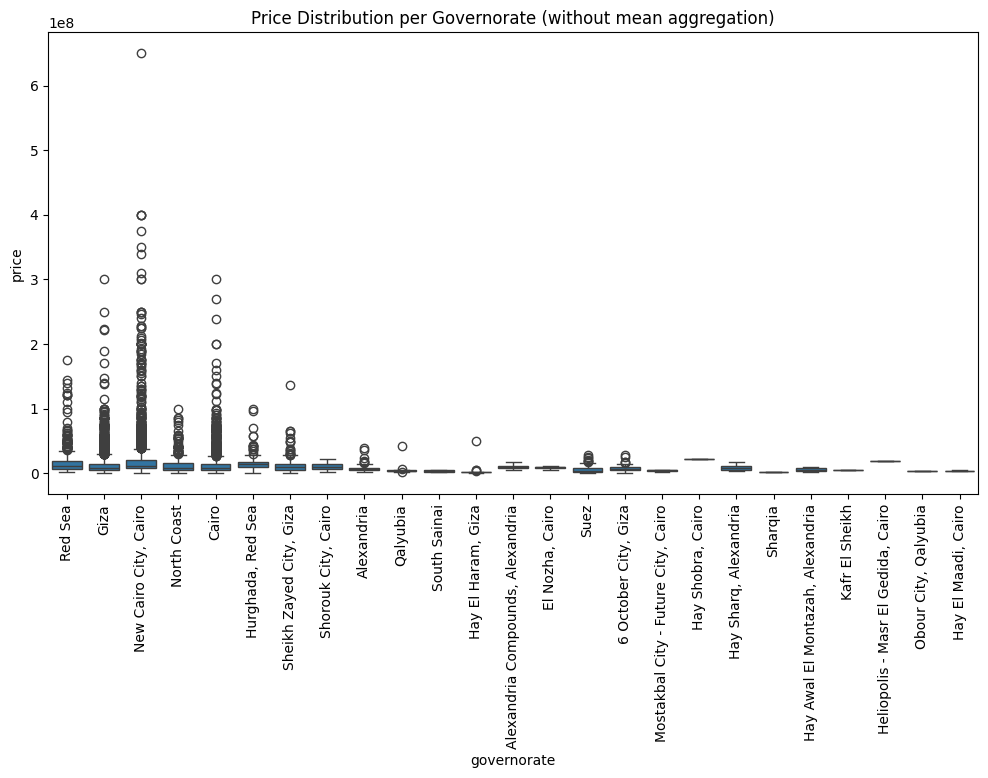

In [106]:
df[['governorate', 'price']].sort_values('governorate')
plt.figure(figsize=(12,6))
sns.boxplot(x='governorate', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution per Governorate (without mean aggregation)')
plt.show()


In [107]:
# 1️⃣ Get top 10 governorates by average price
top_govs = (
    df.groupby('governorate')['price']
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .index
)

# 2️⃣ Filter dataset to only those governorates
df_top_govs = df[df['governorate'].isin(top_govs)]

# 3️⃣ Get top 10 compounds per governorate by average price
top_compounds = (
    df_top_govs.groupby(['governorate', 'compound'])['price']
    .mean()
    .reset_index()
    .sort_values(['governorate', 'price'], ascending=[True, False])
)

# 4️⃣ Take top 10 compounds per governorate
top_10_per_gov = (
    top_compounds.groupby('governorate').head(10)
)

top_10_per_gov


,governorate,compound,price
104,Cairo,Concord Plaza,3.000000e+08
309,Cairo,Swan Lake Katameya,1.059000e+08
222,Cairo,Mirage City,8.333333e+07
327,Cairo,The Waterway Villas,7.500000e+07
99,Cairo,Celesta Hills,6.977359e+07
...,...,...,...
904,"Shorouk City, Cairo",Patio Casa,1.128731e+07
901,"Shorouk City, Cairo",Al Patio Prime,1.115000e+07
903,"Shorouk City, Cairo",El Patio Sola,9.086000e+06
902,"Shorouk City, Cairo",Al Shorouk Road,3.766667e+06


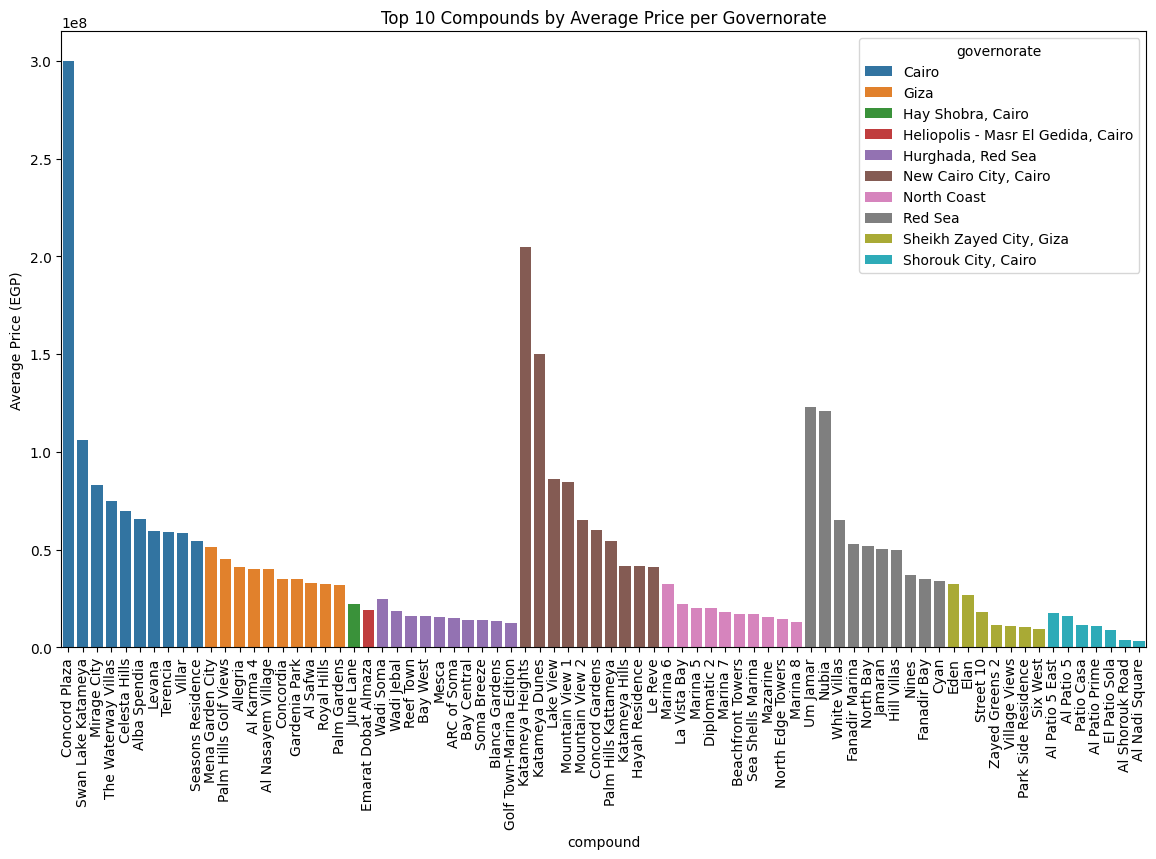

In [108]:
plt.figure(figsize=(14,8))
sns.barplot(data=top_10_per_gov, x='compound', y='price', hue='governorate')
plt.xticks(rotation=90)
plt.title('Top 10 Compounds by Average Price per Governorate')
plt.ylabel('Average Price (EGP)')
plt.show()


In [74]:
# Correlation between price and sizes
corr_size_sqft = df['price'].corr(df['size_sqft'])
corr_size_sqm = df['price'].corr(df['size_sqm'])

print(f"Correlation (price vs size_sqft): {corr_size_sqft:.2f}")
print(f"Correlation (price vs size_sqm): {corr_size_sqm:.2f}")


Correlation (price vs size_sqft): -0.00
Correlation (price vs size_sqm): -0.00


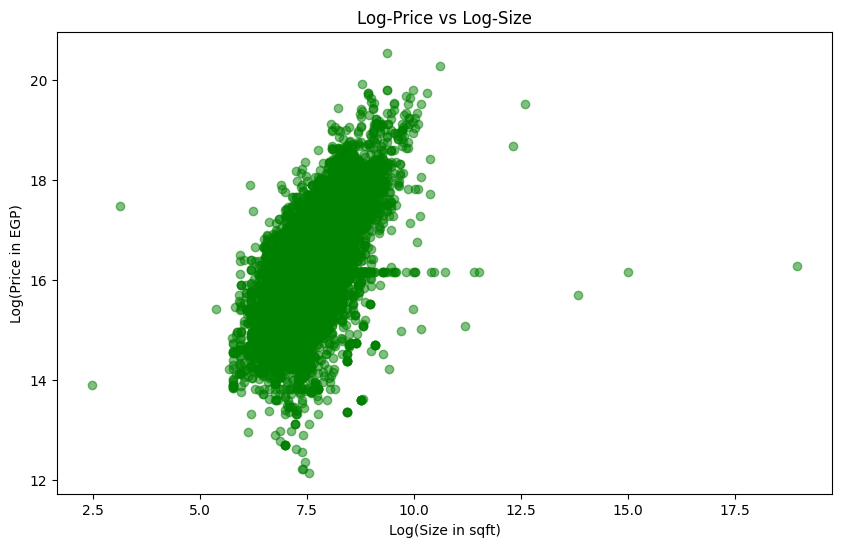

In [75]:
import numpy as np

plt.figure(figsize=(10,6))
plt.scatter(np.log1p(df['size_sqft']), np.log1p(df['price']), alpha=0.5, color='green')
plt.xlabel('Log(Size in sqft)')
plt.ylabel('Log(Price in EGP)')
plt.title('Log-Price vs Log-Size')
plt.show()


In [76]:
# Top 5 most expensive per sqft
df.nlargest(5, 'price_per_sqft')[['price', 'size_sqft', 'price_per_sqft', 'location']]



,price,size_sqft,price_per_sqft,location
2693,39000000.0,22.0,1.772727e+06,"Madinaty, Cairo"
14925,60000000.0,474.0,1.265823e+05,"Villette, 5th Settlement Compounds, The 5th Se..."
14334,1081500.0,11.0,9.831818e+04,"Al Alamein, North Coast"
395,280000000.0,3714.0,7.539041e+04,"Hacienda Heneish, Qesm Marsa Matrouh, North Coast"
14762,840000000.0,11840.0,7.094595e+04,"Marassi, Sidi Abdel Rahman, North Coast"


In [77]:
# Top 5 cheapest per sqft
df.nsmallest(5, 'price_per_sqft')[['price', 'size_sqft', 'price_per_sqft', 'location']]


,price,size_sqft,price_per_sqft,location
4410,11692311.0,170195636.0,0.068699,"Sarai, Mostakbal City Compounds, Mostakbal Cit..."
8277,10345550.0,3255007.0,3.178350,"The 6th Settlement, New Cairo City, Cairo"
15510,6550000.0,1034476.0,6.331708,"Mountain View, Ras Al Hekma, North Coast"
8174,3500000.0,72969.0,47.965574,"Sidi Gaber St., Sidi Gaber, Hay Sharq, Alexandria"
15671,186900.0,1916.0,97.546973,"Belle Vie, New Zayed City, Sheikh Zayed City, ..."


In [78]:
# Top 5 most expensive per sqm
df.nlargest(5, 'price_per_sqm')[['price', 'size_sqm', 'price_per_sqm', 'location']]



,price,size_sqm,price_per_sqm,location
2693,39000000.0,2.0,1.950000e+07,"Madinaty, Cairo"
14925,60000000.0,44.0,1.363636e+06,"Villette, 5th Settlement Compounds, The 5th Se..."
14334,1081500.0,1.0,1.081500e+06,"Al Alamein, North Coast"
395,280000000.0,345.0,8.115942e+05,"Hacienda Heneish, Qesm Marsa Matrouh, North Coast"
14762,840000000.0,1100.0,7.636364e+05,"Marassi, Sidi Abdel Rahman, North Coast"


In [79]:
# Top 5 most cheapest per sqm
df.nsmallest(5, 'price_per_sqm')[['price', 'size_sqm', 'price_per_sqm', 'location']]



,price,size_sqm,price_per_sqm,location
4410,11692311.0,15811692.0,0.739472,"Sarai, Mostakbal City Compounds, Mostakbal Cit..."
8277,10345550.0,302400.0,34.211475,"The 6th Settlement, New Cairo City, Cairo"
15510,6550000.0,96106.0,68.153913,"Mountain View, Ras Al Hekma, North Coast"
8174,3500000.0,6779.0,516.300339,"Sidi Gaber St., Sidi Gaber, Hay Sharq, Alexandria"
15671,186900.0,178.0,1050.000000,"Belle Vie, New Zayed City, Sheikh Zayed City, ..."


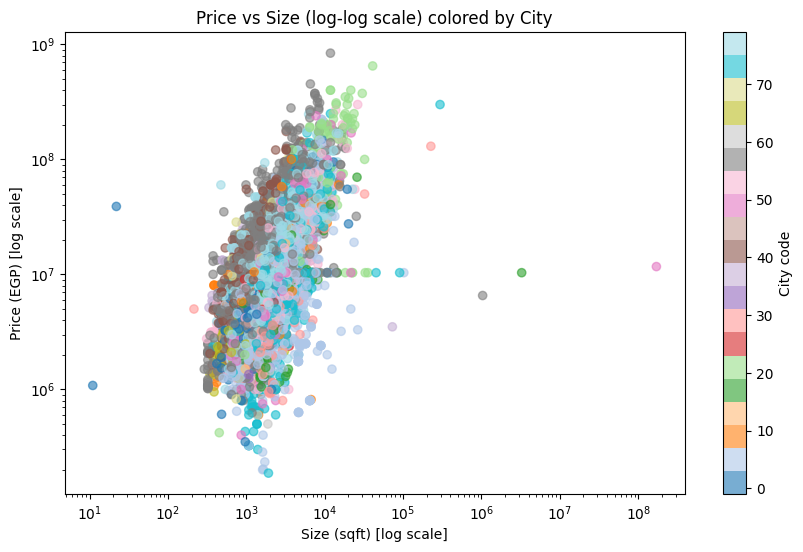

In [80]:

plt.figure(figsize=(10,6))
scatter = plt.scatter(
    df['size_sqft'],
    df['price'],
    c=df['city'].astype('category').cat.codes,  # color by city
    cmap='tab20',
    alpha=0.6
)

plt.xscale('log')  # log scale for size
plt.yscale('log')  # log scale for price
plt.xlabel('Size (sqft) [log scale]')
plt.ylabel('Price (EGP) [log scale]')
plt.title('Price vs Size (log-log scale) colored by City')
plt.colorbar(scatter, label='City code')
plt.show()


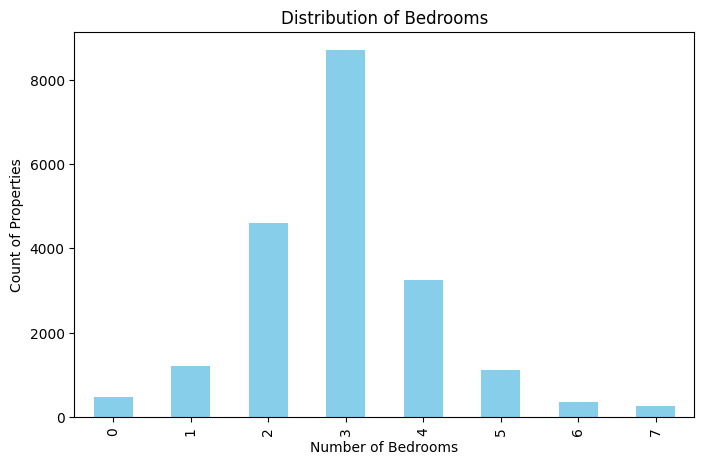

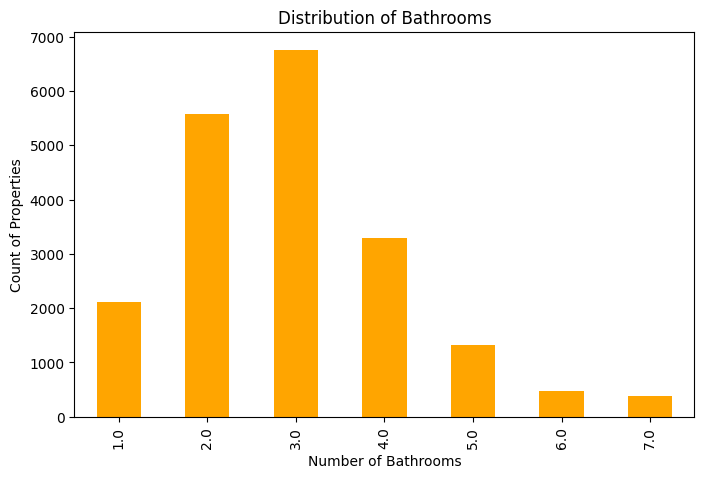

In [81]:
# Bedrooms distribution
df['bedrooms'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count of Properties')
plt.title('Distribution of Bedrooms')
plt.show()

# Bathrooms distribution
df['bathrooms'].value_counts().sort_index().plot(kind='bar', figsize=(8,5), color='orange')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count of Properties')
plt.title('Distribution of Bathrooms')
plt.show()


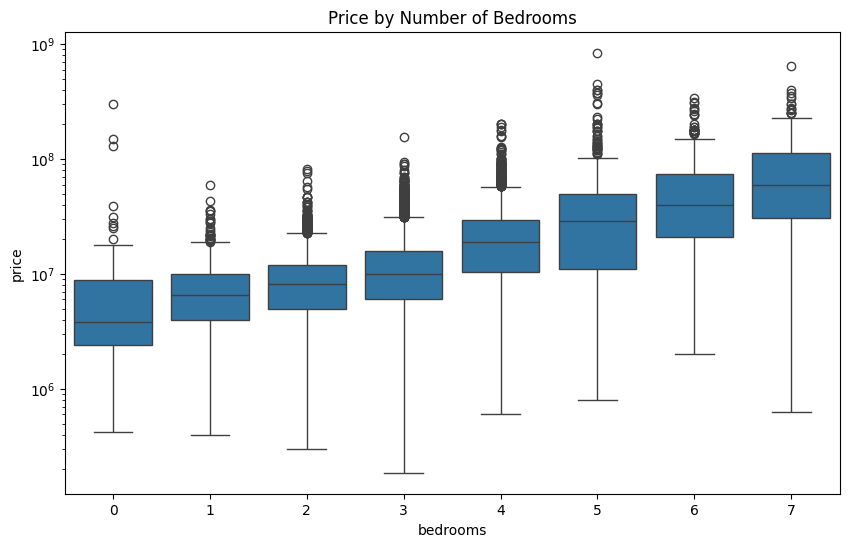

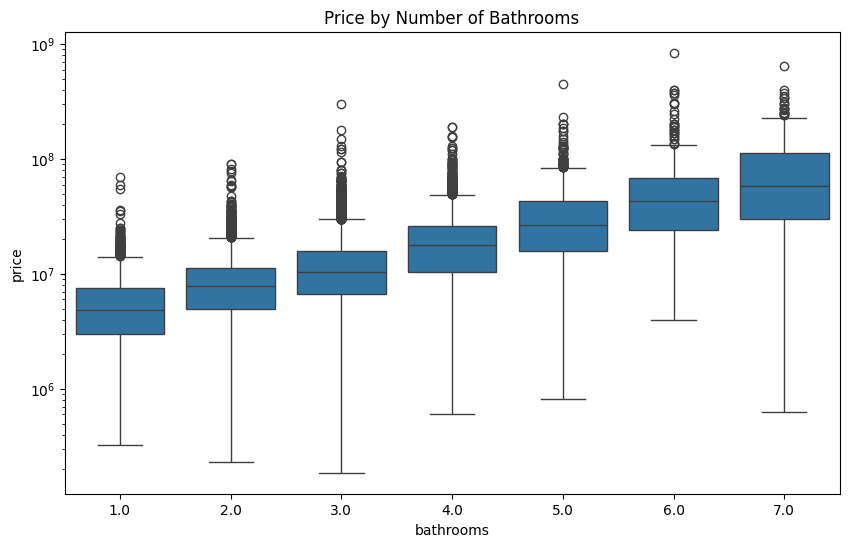

In [82]:
import seaborn as sns

# Boxplot: Price vs Bedrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.yscale('log')  # Use log if prices vary a lot
plt.title('Price by Number of Bedrooms')
plt.show()

# Boxplot: Price vs Bathrooms
plt.figure(figsize=(10,6))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.yscale('log')
plt.title('Price by Number of Bathrooms')
plt.show()


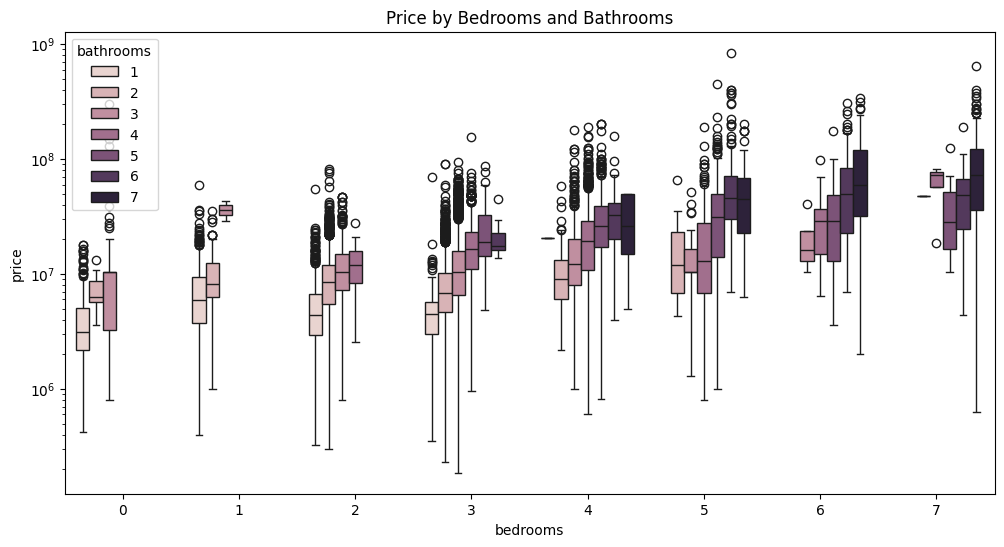

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms', y='price', hue='bathrooms', data=df)
plt.yscale('log')
plt.title('Price by Bedrooms and Bathrooms')
plt.show()


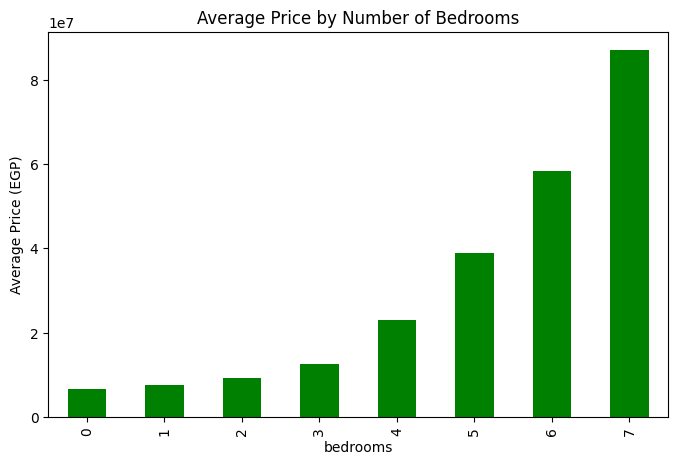

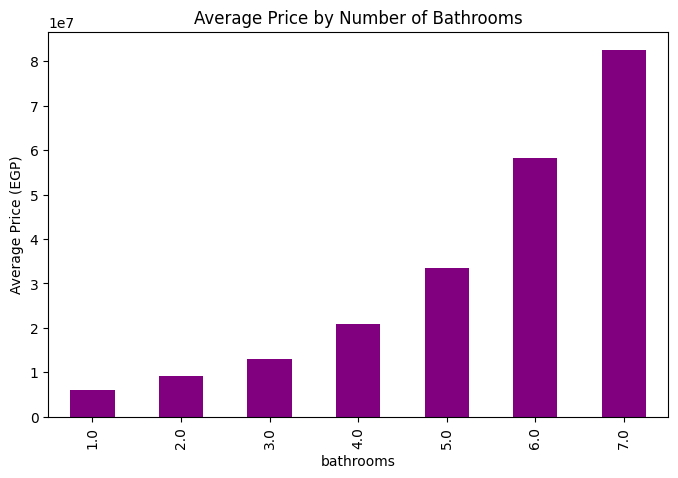

In [84]:
# Average price per bedroom
avg_price_bedrooms = df.groupby('bedrooms')['price'].mean()
avg_price_bedrooms.plot(kind='bar', figsize=(8,5), color='green')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Number of Bedrooms')
plt.show()

# Average price per bathroom
avg_price_bathrooms = df.groupby('bathrooms')['price'].mean()
avg_price_bathrooms.plot(kind='bar', figsize=(8,5), color='purple')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Number of Bathrooms')
plt.show()


In [85]:
avg_price = df.groupby(['bedrooms','mid_room'])['price'].mean().unstack()
print(avg_price)


mid_room             0             1
bedrooms                            
0         6.701648e+06  6.861851e+06
1         6.784682e+06  9.038921e+06
2         8.142635e+06  1.113326e+07
3         1.020856e+07  1.542087e+07
4         1.990983e+07  2.480616e+07
5         3.210689e+07  4.180324e+07
6         5.427757e+07  5.987417e+07
7         7.582954e+07  9.035037e+07


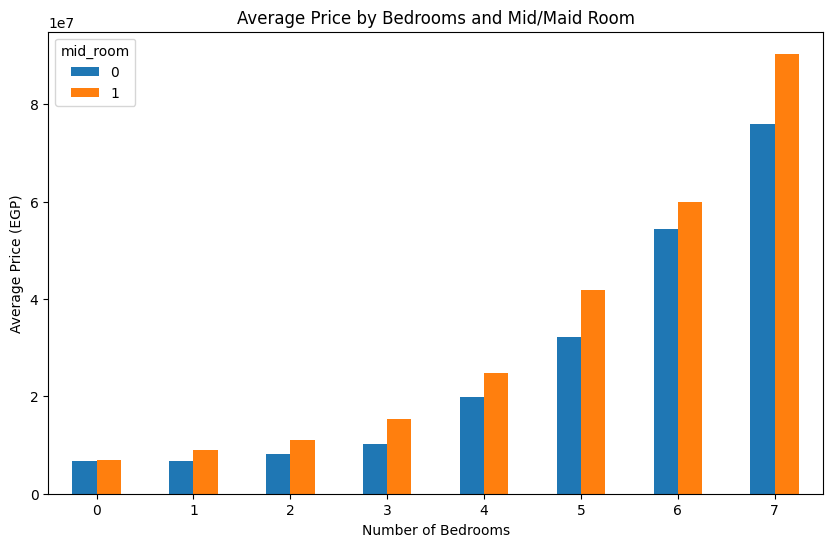

In [86]:
avg_price.plot(kind='bar', figsize=(10,6))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Bedrooms and Mid/Maid Room')
plt.xticks(rotation=0)
plt.show()


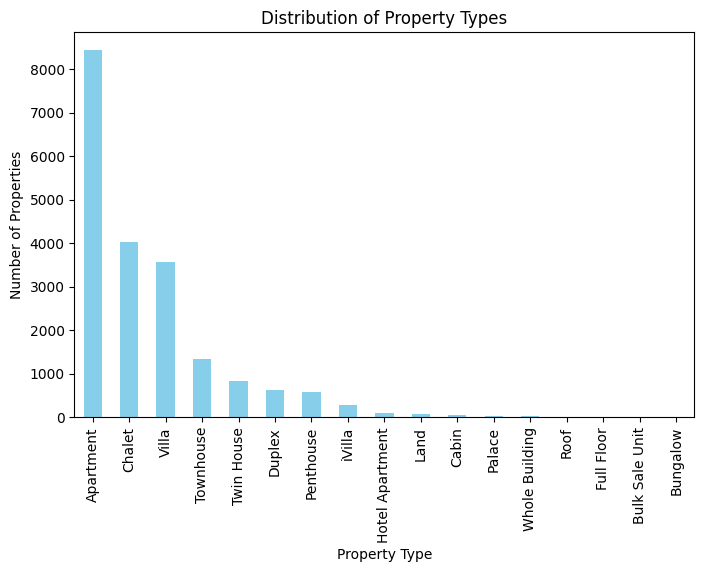

In [87]:
df['type'].value_counts().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Distribution of Property Types')
plt.show()


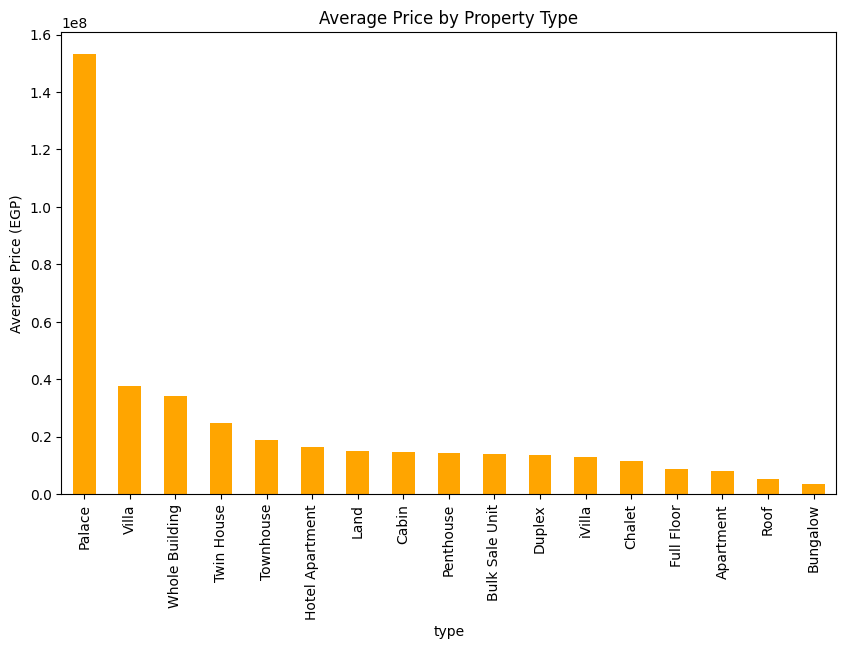

In [88]:
avg_price_type = df.groupby('type')['price'].mean().sort_values(ascending=False)
avg_price_type.plot(kind='bar', figsize=(10,6), color='orange')
plt.ylabel('Average Price (EGP)')
plt.title('Average Price by Property Type')
plt.show()


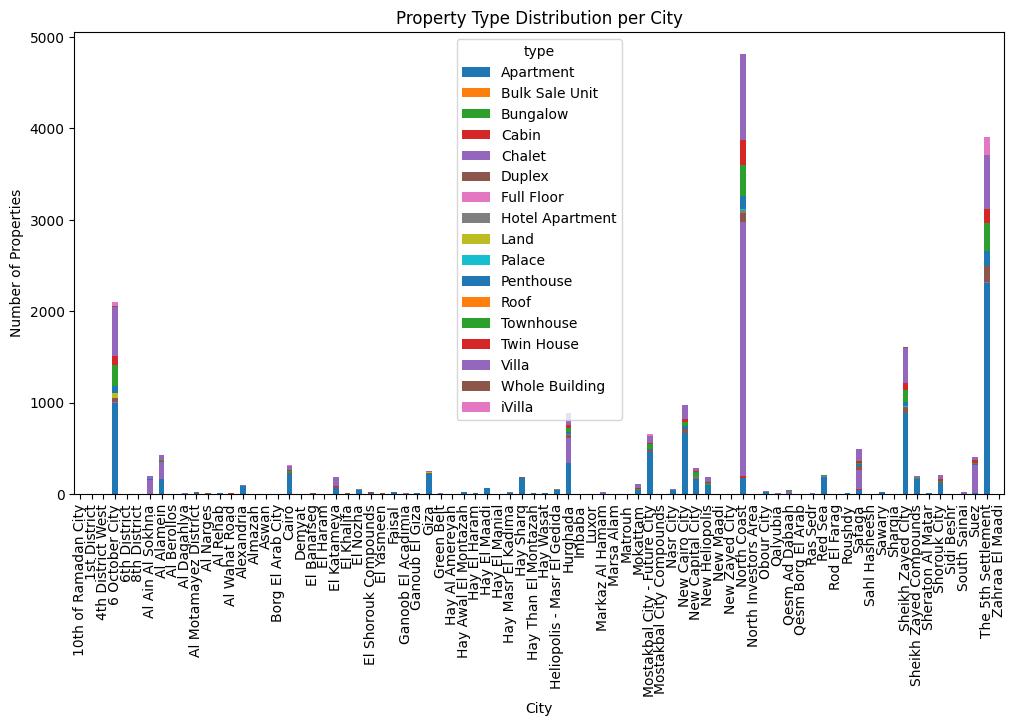

In [89]:
type_location = df.groupby(['city', 'type']).size().unstack(fill_value=0)
type_location.plot(kind='bar', stacked=True, figsize=(12,6))
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.title('Property Type Distribution per City')
plt.show()


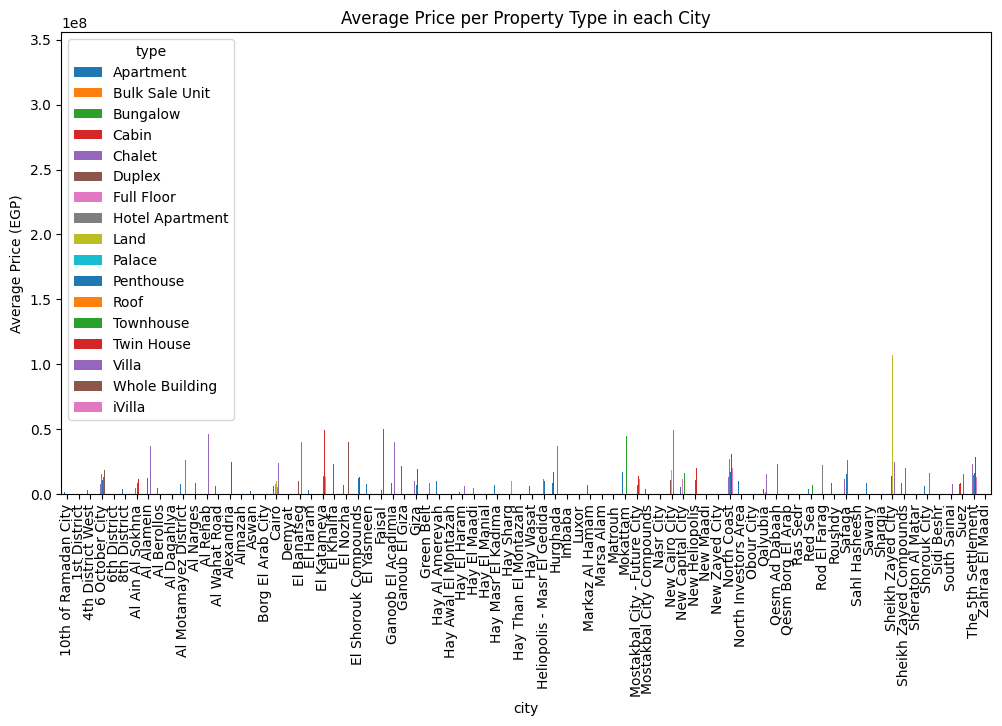

In [90]:
avg_price_type_loc = df.groupby(['city','type'])['price'].mean().unstack()
avg_price_type_loc.plot(kind='bar', figsize=(12,6))
plt.ylabel('Average Price (EGP)')
plt.title('Average Price per Property Type in each City')
plt.show()


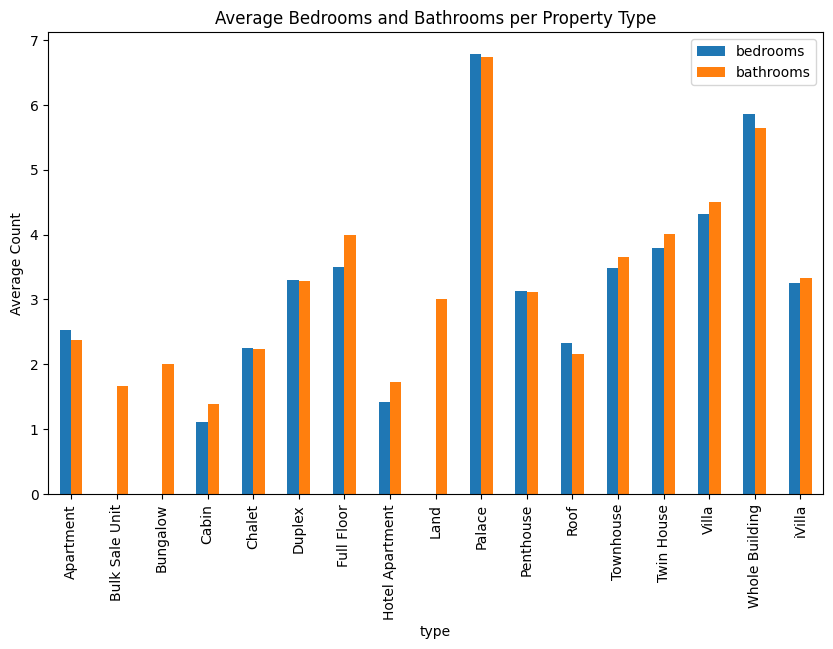

In [91]:
# Group by type and calculate average bedrooms and bathrooms
type_bed_bath = df.groupby('type')[['bedrooms', 'bathrooms']].mean()
type_bed_bath.plot(kind='bar', figsize=(10,6))
plt.ylabel('Average Count')
plt.title('Average Bedrooms and Bathrooms per Property Type')
plt.show()


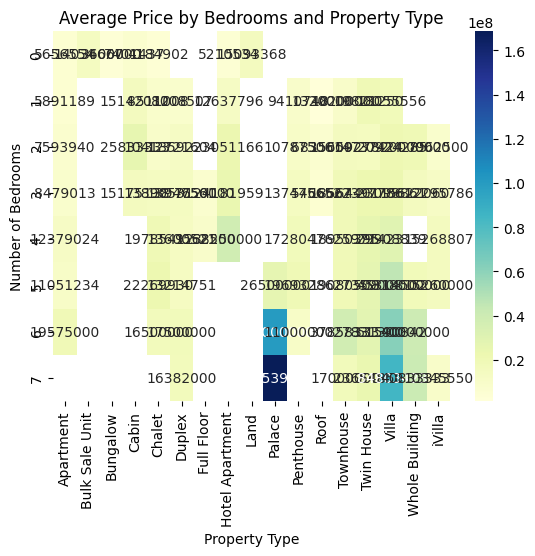

In [92]:
avg_price_bed_type = df.groupby(['bedrooms','type'])['price'].mean().unstack()
sns.heatmap(avg_price_bed_type, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Average Price by Bedrooms and Property Type')
plt.xlabel('Property Type')
plt.ylabel('Number of Bedrooms')
plt.show()
